In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

In [6]:
pd.read_csv('Data/games.csv')

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,...,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,...,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,...,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,...,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,...,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
23516,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
23517,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
23518,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [7]:
##2.1 Exploration des données
GAME_COLS  =['GAME_ID','PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',	'AST_away',	'REB_away','HOME_TEAM_WINS']
data = pd.read_csv('Data/games.csv', usecols = GAME_COLS)
data

,GAME_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,12000047,120.0,0.433,0.792,0.425,23.0,50.0,0.444,0.864,0.439,21.0,52.0,1
1,12000048,99.0,0.427,0.625,0.295,24.0,45.0,0.402,0.647,0.326,18.0,51.0,1
2,12000049,116.0,0.400,0.744,0.396,21.0,43.0,0.422,0.837,0.297,24.0,47.0,0
3,12000039,107.0,0.371,0.692,0.262,19.0,45.0,0.533,0.629,0.355,23.0,48.0,0
4,12000040,105.0,0.380,0.737,0.356,27.0,37.0,0.534,0.741,0.514,30.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,11400007,93.0,0.419,0.821,0.421,24.0,50.0,0.366,0.643,0.375,17.0,43.0,1
23516,11400004,81.0,0.338,0.719,0.381,18.0,40.0,0.411,0.636,0.267,17.0,47.0,0
23517,11400005,98.0,0.448,0.682,0.500,29.0,45.0,0.387,0.659,0.500,19.0,43.0,1
23518,11400002,99.0,0.440,0.771,0.333,21.0,30.0,0.469,0.725,0.385,18.0,45.0,1


In [16]:
rebound = data.loc[:,"REB_home"]
homeWin = data.loc[:,"HOME_TEAM_WINS"]*100

In [24]:
## impact du nombre de rebonds sur la victoire
reboundHWin = []
reboundAWin = []
reboundHLoose = []
reboundALoose = []
i = 0
for x in homeWin:
    if x == 100:
        reboundHWin.append(data.loc[i,"REB_home"])
        reboundAWin.append(data.loc[i,"REB_away"])
    else:
        reboundHLoose.append(data.loc[i,"REB_home"])
        reboundALoose.append(data.loc[i,"REB_away"])
    i = i + 1

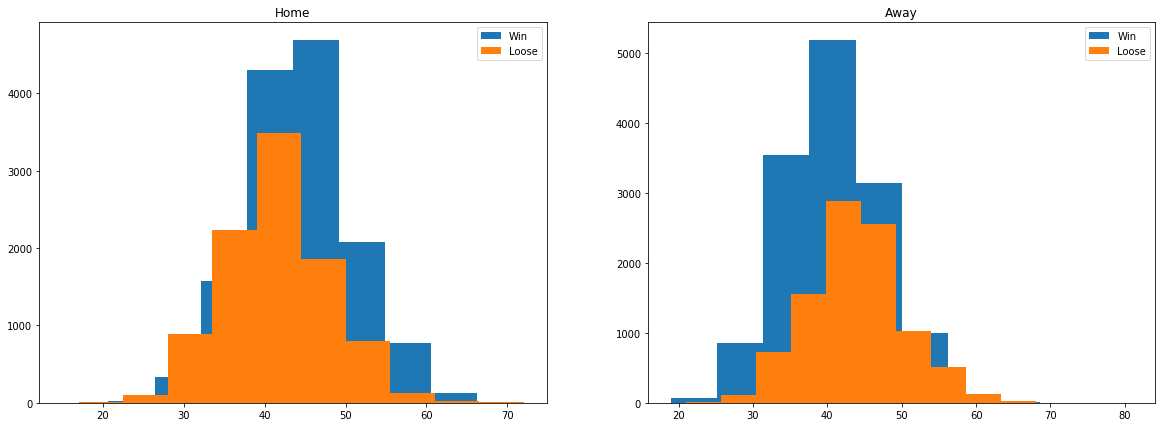

In [26]:
fig = plt.figure(1, figsize=(20,7))
plt.xlabel('Nombre de passes décisives')
plt.ylabel('Nombre de matchs')

#home
plt.subplot(1,2,1)
plt.hist(reboundHWin, label='Win')
plt.hist(reboundHLoose, label= 'Loose')
plt.title("Home")
plt.legend()
#On remarque que quand home fait des rebonds elle gagne plus souvent et plus le nombre de rebond est élevé plus elle gagne

#away
plt.subplot(1,2,2)
plt.hist(reboundAWin, label='Win')
plt.hist(reboundALoose, label= 'Loose')
plt.title("Away")
plt.legend()
#Par contre pour away l'equipe gagne plus quand le nombre de rebond est moins élevé.

In [27]:
## impact du nombre de passes décisives sur la victoire
assistHWin = []
assistAWin = []
assistHLoose = []
assistALoose = []
i = 0
for x in homeWin:
    if x == 100:
        assistHWin.append(data.loc[i,"AST_home"])
        assistALoose.append(data.loc[i,"AST_away"])
    else:
        assistHLoose.append(data.loc[i,"AST_home"])
        assistAWin.append(data.loc[i,"AST_away"])
    i = i + 1

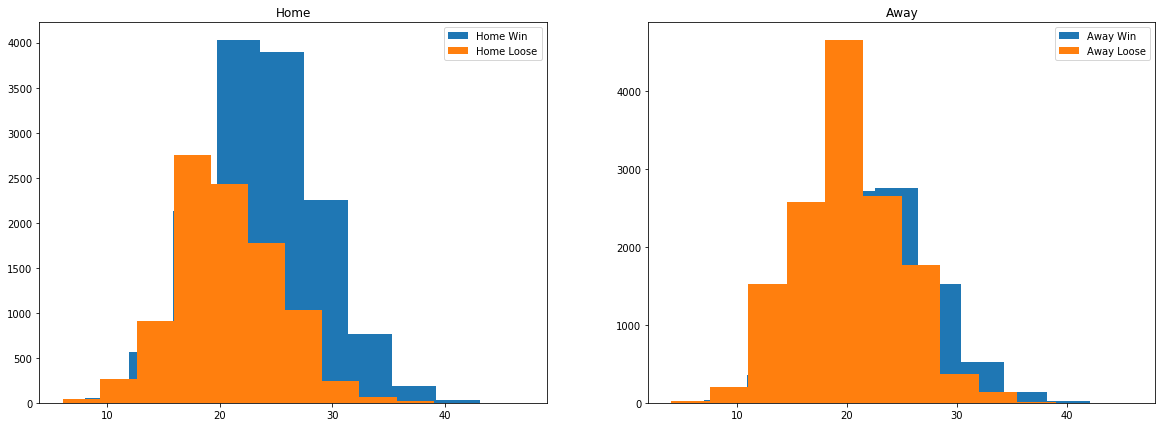

In [32]:
fig = plt.figure(1, figsize=(20,7))
plt.xlabel('Nombre de passes décisives')
plt.ylabel('Nombre de matchs')

#home
plt.subplot(1,2,1)
plt.hist(assistHWin, label='Home Win')
plt.hist(assistHLoose, label= 'Home Loose')
plt.title("Home")
plt.legend()
#On remarque quand home gagne les matchs, elle a fait plus de passes décisives

#away
plt.subplot(1,2,2)
plt.hist(assistAWin, label='Away Win')
plt.hist(assistALoose, label= 'Away Loose')
plt.title("Away")
plt.legend()
#Quand away loose son nombre moyen de passes décisives par match est plus bas

In [33]:
## impact du nombre de points marqués sur la victoire
ptsHWin = []
ptsHLoose = []
homeWin = data.loc[:,"HOME_TEAM_WINS"] * 100

i = 0
for x in homeWin:
    if x == 100:
        ptsHWin.append(data.loc[i,"PTS_home"])
    else:
        ptsHLoose.append(data.loc[i,"PTS_home"])
       
    i = i + 1

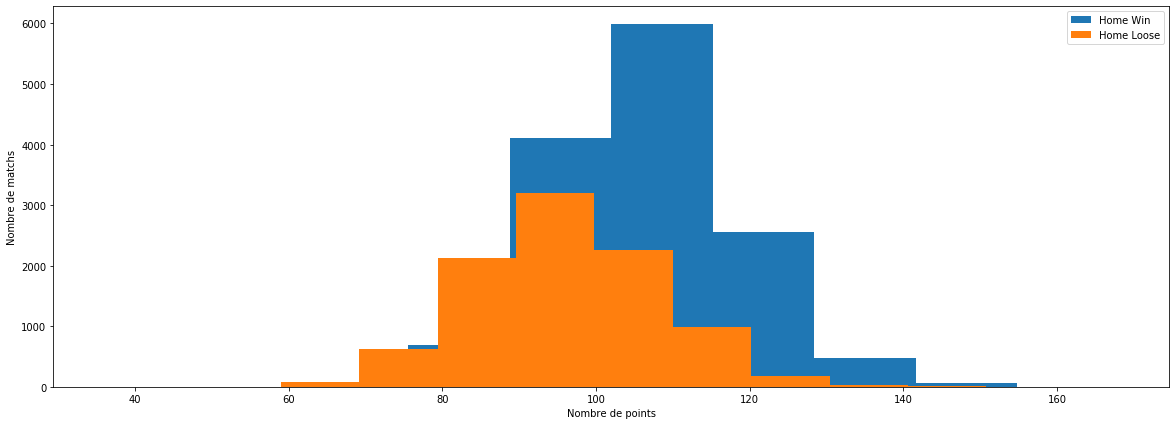

In [12]:
fig = plt.figure(1, figsize=(20,7))
plt.xlabel('Nombre de points')
plt.ylabel('Nombre de matchs')
#plt.subplot(1,2,1)
plt.hist(ptsHWin, label='Home Win')
#plt.subplot(1,2,2)
plt.hist(ptsHLoose, label= 'Home Loose')
plt.legend()
#Est-ce que à partir d'un certains nombres de point marqués à domicile on peut ou pas définir qui va gagner ?

In [22]:
#attribution des données pour y
y = data.loc[:,"HOME_TEAM_WINS"]
y.shape


(23520,)

In [23]:
#attribution des données pour X 
X_ARG  =['GAME_ID','PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',	'AST_away',	'REB_away']
X = pd.read_csv('Data/games.csv', usecols = X_ARG)
X.shape

(23520, 12)

In [ ]:
#Rélisation d'un SVM

In [ ]:
##générer un validation set adéquat
Xval = 
yval = 

In [ ]:
#générer un entrainement set adéquat.
Xtrain = 
ytrain = 

In [ ]:
import sklearn.svm
#definir la valeur des hyper-parametres du modele
clf = sklearn.svm.SVC(1.0,'linear') 
#entrainer le modele
clf.fit(Xtrain,ytrain)

y_pred = clf.predict(X)
print("training score:",clf.score(Xtrain,ytrain))
print("validation score:",clf.score(Xval,yval))